## Importing Libraries

In [40]:
%matplotlib inline
from pandas import read_csv
from pandas import get_dummies
import matplotlib.pyplot as plt
from numpy import random
from sklearn.preprocessing import MinMaxScaler

## Loading the Data

In [41]:
data = read_csv("Breast_Cancer.csv", header=0, delimiter=',')
data.shape

(4024, 16)

In [42]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [43]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## Inspection of the Dataset

In [44]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [45]:
data['Status'].value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

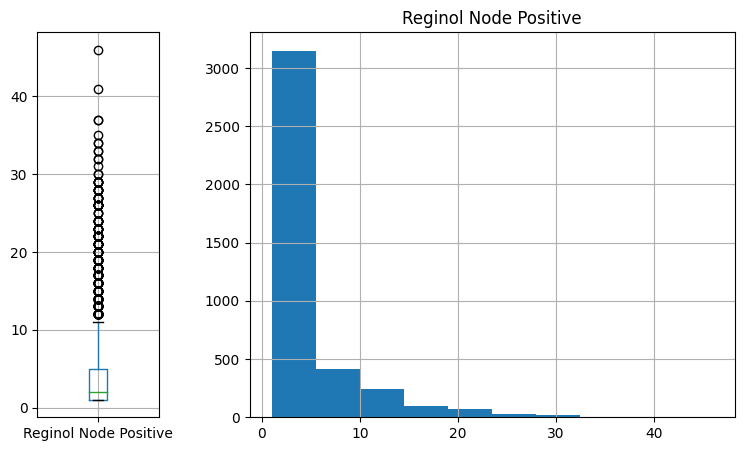

In [46]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
data.boxplot(column='Reginol Node Positive',ax=axes[0]);
data.hist(column='Reginol Node Positive', ax=axes[1]);

### IQR

In [47]:
Q1 = data['Reginol Node Positive'].quantile(0.25)
Q3 = data['Reginol Node Positive'].quantile(0.75)
IQR = Q3 - Q1

small_outliers = data['Reginol Node Positive'] < (Q1 - 1.5 * IQR)
big_outliers = data['Reginol Node Positive'] > (Q3 + 1.5 * IQR)
sum(small_outliers), sum(big_outliers)

(0, 344)

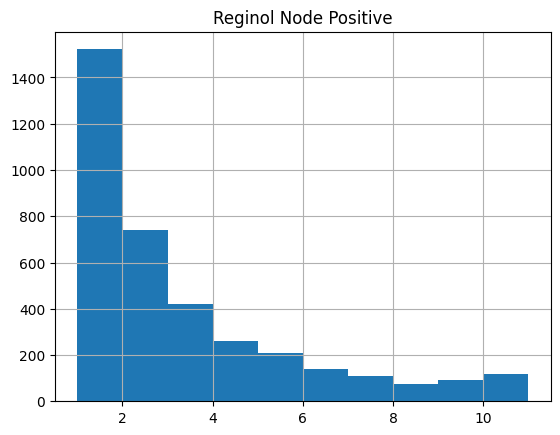

In [48]:
data[~(small_outliers | big_outliers)].hist(column='Reginol Node Positive');

array([[<Axes: title={'center': 'Reginol Node Positive'}>]], dtype=object)

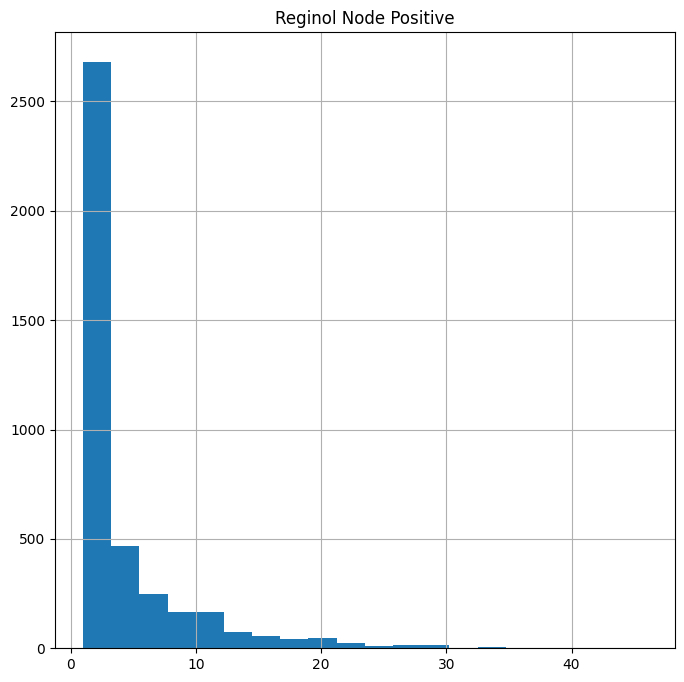

In [49]:
data.hist(column='Reginol Node Positive',bins=20,figsize=(8,8))

## One Hot Encoding

In [50]:
categorical_cols = ['Race','Marital Status','T Stage ','N Stage','6th Stage','differentiate','Grade','A Stage','Estrogen Status','Progesterone Status']
data = get_dummies(data, columns = categorical_cols)
data.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Black,Race_Other,Race_White,Marital Status_Divorced,...,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
0,68,4,24,1,60,Alive,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1
1,50,35,14,5,62,Alive,0,0,1,0,...,0,0,1,0,0,1,0,1,0,1
2,58,63,14,7,75,Alive,0,0,1,1,...,0,0,1,0,0,1,0,1,0,1
3,58,18,2,1,84,Alive,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1
4,47,41,3,1,50,Alive,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1


## Normalization

In [51]:
min_max_scaler = MinMaxScaler()
data[['Age','Tumor Size','Regional Node Examined','Reginol Node Positive','Survival Months']] = min_max_scaler.fit_transform(data[['Age','Tumor Size','Regional Node Examined','Reginol Node Positive','Survival Months']])
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,...,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,...,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,0.614671,0.212041,0.222618,0.070179,0.663188,0.072316,0.079523,0.848161,0.120775,0.656809,...,0.004722,0.134940,0.584245,0.276093,0.022863,0.977137,0.066849,0.933151,0.173459,0.826541
std,0.229824,0.151940,0.134995,0.113541,0.216240,0.259043,0.270587,0.358909,0.325907,0.474834,...,0.068561,0.341702,0.492913,0.447119,0.149485,0.149485,0.249791,0.249791,0.378691,0.378691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.435897,0.107914,0.133333,0.000000,0.518868,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,0.615385,0.172662,0.216667,0.022222,0.679245,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,0.794872,0.266187,0.300000,0.088889,0.839623,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Saving the Data

In [52]:
random.seed(144)
data = data.sample(frac=1).reset_index(drop=True)
data.to_csv('Breast_Cancer_Processed.csv')